多维透视分析

In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\\usere\\Desktop\\PB Sales.csv')
df

,Account,Trader,Counterparty,Ticker,Quantity,Value,Category
0,MM714466,Steven Wang,Goldman Sachs,AAPL,100,35000,Stock
1,MM714466,Steven Wang,Goldman Sachs,NDAQ200619P,200,10000,Option
2,MM714466,Steven Wang,Goldman Sachs,UGEMVPU,200,20000,Fund
3,MM737550,Steven Wang,Goldman Sachs,AAPL,100,35000,Stock
4,MM146832,Sherry Zhang,Goldman Sachs,AAPL,200,70000,Stock
5,MM218895,Sherry Zhang,Goldman Sachs,AAPL,200,70000,Stock
6,MM218895,Sherry Zhang,Goldman Sachs,NDAQ200619P,200,10000,Option
7,MM412290,Lily Song,Goldman Sachs,UGEMVPU,200,20000,Fund
8,MM740150,Lily Song,Goldman Sachs,AAPL,100,35000,Stock
9,MM141962,Bryan Hu,Morgan Stanley,AAPL,200,70000,Stock


In [5]:
pd.pivot_table(df,index='Account') #默认求平均

,Quantity,Value
Account,,
MM141962,200.000000,70000.000000
MM146832,200.000000,70000.000000
MM163416,100.000000,35000.000000
MM218895,200.000000,40000.000000
MM239344,150.000000,10000.000000
MM307599,300.000000,30000.000000
MM412290,200.000000,20000.000000
MM688981,500.000000,175000.000000
MM714466,166.666667,21666.666667


In [6]:
pd.pivot_table(df,index=['Account','Trader','Counterparty'])

,,,Quantity,Value
Account,Trader,Counterparty,,
MM141962,Bryan Hu,Morgan Stanley,200.000000,70000.000000
MM146832,Sherry Zhang,Goldman Sachs,200.000000,70000.000000
MM163416,Bryan Hu,Morgan Stanley,100.000000,35000.000000
MM218895,Sherry Zhang,Goldman Sachs,200.000000,40000.000000
MM239344,Bryan Hu,Morgan Stanley,150.000000,10000.000000
MM307599,Nicolas Liu,Morgan Stanley,300.000000,30000.000000
MM412290,Lily Song,Goldman Sachs,200.000000,20000.000000
MM688981,Nicolas Liu,Morgan Stanley,500.000000,175000.000000
MM714466,Steven Wang,Goldman Sachs,166.666667,21666.666667


改变index里面的标签顺序

In [7]:
pd.pivot_table(df,index=['Counterparty','Trader'])

Quantity  Value
Counterparty   Trader                       
Goldman Sachs  Lily Song          150  27500
               Sherry Zhang       200  50000
               Steven Wang        150  25000
Morgan Stanley Bryan Hu           150  31250
               Nicolas Liu        300  72500

只在数值型列上整合

In [8]:
df.dtypes

Account         object
Trader          object
Counterparty    object
Ticker          object
Quantity         int64
Value            int64
Category        object
dtype: object

只显示value值

In [10]:
pd.pivot_table(df,index=['Counterparty','Trader'],values='Value')

Value
Counterparty   Trader             
Goldman Sachs  Lily Song     27500
               Sherry Zhang  50000
               Steven Wang   25000
Morgan Stanley Bryan Hu      31250
               Nicolas Liu   72500

In [11]:
pd.pivot_table(df,index=['Counterparty','Trader'],
               values=['Value'],
              aggfunc=[len,np.sum]) #设置多个函数

len     sum
                            Value   Value
Counterparty   Trader                    
Goldman Sachs  Lily Song        2   55000
               Sherry Zhang     3  150000
               Steven Wang      4  100000
Morgan Stanley Bryan Hu         4  125000
               Nicolas Liu      4  290000

In [13]:
pd.pivot_table(df,index=['Counterparty','Trader'],
              values=['Value'],
              columns=['Category'],
              aggfunc=[len,np.sum])

len                        sum           \
                            Value                      Value            
Category                     Bond Fund Option Stock     Bond     Fund   
Counterparty   Trader                                                   
Goldman Sachs  Lily Song      NaN  1.0    NaN   1.0      NaN  20000.0   
               Sherry Zhang   NaN  NaN    1.0   2.0      NaN      NaN   
               Steven Wang    NaN  1.0    1.0   2.0      NaN  20000.0   
Morgan Stanley Bryan Hu       NaN  1.0    1.0   2.0      NaN  10000.0   
               Nicolas Liu    1.0  1.0    NaN   2.0  15000.0  30000.0   

                                                
                                                
Category                      Option     Stock  
Counterparty   Trader                           
Goldman Sachs  Lily Song         NaN   35000.0  
               Sherry Zhang  10000.0  140000.0  
               Steven Wang   10000.0   70000.0  
Morgan Stanley Bryan Hu      10000.0  105000.0  
               Nicolas Liu       NaN  245000.0

In [15]:
pd.pivot_table(df,index=['Counterparty','Trader'],
              values=['Value'],
              columns=['Category'],
              aggfunc=[len,np.sum],
              fill_value=0)

len                      sum                \
                            Value                    Value                 
Category                     Bond Fund Option Stock   Bond   Fund Option   
Counterparty   Trader                                                      
Goldman Sachs  Lily Song        0    1      0     1      0  20000      0   
               Sherry Zhang     0    0      1     2      0      0  10000   
               Steven Wang      0    1      1     2      0  20000  10000   
Morgan Stanley Bryan Hu         0    1      1     2      0  10000  10000   
               Nicolas Liu      1    1      0     2  15000  30000      0   

                                     
                                     
Category                      Stock  
Counterparty   Trader                
Goldman Sachs  Lily Song      35000  
               Sherry Zhang  140000  
               Steven Wang    70000  
Morgan Stanley Bryan Hu      105000  
               Nicolas Liu   245000

In [16]:
#类别放在index中
pd.pivot_table(df,index=['Counterparty','Trader','Category'],
              values=['Value'],
              aggfunc=[len,np.sum],
              fill_value=0)

len     sum
                                     Value   Value
Counterparty   Trader       Category              
Goldman Sachs  Lily Song    Fund         1   20000
                            Stock        1   35000
               Sherry Zhang Option       1   10000
                            Stock        2  140000
               Steven Wang  Fund         1   20000
                            Option       1   10000
                            Stock        2   70000
Morgan Stanley Bryan Hu     Fund         1   10000
                            Option       1   10000
                            Stock        2  105000
               Nicolas Liu  Bond         1   15000
                            Fund         1   30000
                            Stock        2  245000

margins=True得到总计

In [17]:
pd.pivot_table(df,index=['Counterparty','Trader','Category'],
              values=['Value'],
              aggfunc=[len,np.sum],
              fill_value=0,
              margins=True)

len     sum
                                     Value   Value
Counterparty   Trader       Category              
Goldman Sachs  Lily Song    Fund         1   20000
                            Stock        1   35000
               Sherry Zhang Option       1   10000
                            Stock        2  140000
               Steven Wang  Fund         1   20000
                            Option       1   10000
                            Stock        2   70000
Morgan Stanley Bryan Hu     Fund         1   10000
                            Option       1   10000
                            Stock        2  105000
               Nicolas Liu  Bond         1   15000
                            Fund         1   30000
                            Stock        2  245000
All                                     17  720000

传入字典实现不同列下不同整合函数

In [18]:
pd.pivot_table(df,index=['Counterparty','Trader','Category'],
              values=['Value','Quantity'],
              aggfunc={'Value':np.sum,'Quantity':len},
              fill_value=0,
              margins=True)

Quantity   Value
Counterparty   Trader       Category                  
Goldman Sachs  Lily Song    Fund             1   20000
                            Stock            1   35000
               Sherry Zhang Option           1   10000
                            Stock            2  140000
               Steven Wang  Fund             1   20000
                            Option           1   10000
                            Stock            2   70000
Morgan Stanley Bryan Hu     Fund             1   10000
                            Option           1   10000
                            Stock            2  105000
               Nicolas Liu  Bond             1   15000
                            Fund             1   30000
                            Stock            2  245000
All                                         17  720000

In [19]:
pd.pivot_table(df,index=['Counterparty','Trader','Category'],
              values=['Value','Quantity'],
              aggfunc={'Value':[np.sum,min,max],'Quantity':len},
              fill_value=0)

Quantity   Value               
                                          len     max    min     sum
Counterparty   Trader       Category                                
Goldman Sachs  Lily Song    Fund            1   20000  20000   20000
                            Stock           1   35000  35000   35000
               Sherry Zhang Option          1   10000  10000   10000
                            Stock           2   70000  70000  140000
               Steven Wang  Fund            1   20000  20000   20000
                            Option          1   10000  10000   10000
                            Stock           2   35000  35000   70000
Morgan Stanley Bryan Hu     Fund            1   10000  10000   10000
                            Option          1   10000  10000   10000
                            Stock           2   70000  35000  105000
               Nicolas Liu  Bond            1   15000  15000   15000
                            Fund            1   30000  30000   30000
                            Stock           2  175000  70000  245000

In [22]:
table=pd.pivot_table(df,index=['Counterparty','Trader','Category'],
                    values=['Value','Quantity'],
                    aggfunc={'Value':np.sum,'Quantity':len},
                    fill_value=0)
table

Quantity   Value
Counterparty   Trader       Category                  
Goldman Sachs  Lily Song    Fund             1   20000
                            Stock            1   35000
               Sherry Zhang Option           1   10000
                            Stock            2  140000
               Steven Wang  Fund             1   20000
                            Option           1   10000
                            Stock            2   70000
Morgan Stanley Bryan Hu     Fund             1   10000
                            Option           1   10000
                            Stock            2  105000
               Nicolas Liu  Bond             1   15000
                            Fund             1   30000
                            Stock            2  245000

In [27]:
table.query("Trader==['Steven Wang','Sherry Zhang']")

Quantity   Value
Counterparty  Trader       Category                  
Goldman Sachs Sherry Zhang Option           1   10000
                           Stock            2  140000
              Steven Wang  Fund             1   20000
                           Option           1   10000
                           Stock            2   70000

In [29]:
table.query("Category==['Fund','Option']")

Quantity  Value
Counterparty   Trader       Category                 
Goldman Sachs  Lily Song    Fund             1  20000
               Sherry Zhang Option           1  10000
               Steven Wang  Fund             1  20000
                            Option           1  10000
Morgan Stanley Bryan Hu     Fund             1  10000
                            Option           1  10000
               Nicolas Liu  Fund             1  30000

多维交叉分析

默认个数和频率

In [30]:
loan=pd.read_csv('C:\\Users\\usere\\Desktop\\Loan Data.csv')

In [31]:
loan.head(3).append(loan.tail(2))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
person_age                    32581 non-null int64
person_income                 32581 non-null int64
person_home_ownership         32581 non-null object
person_emp_length             31686 non-null float64
loan_intent                   32581 non-null object
loan_grade                    32581 non-null object
loan_amnt                     32581 non-null int64
loan_int_rate                 29465 non-null float64
loan_status                   32581 non-null int64
loan_percent_income           32581 non-null float64
cb_person_default_on_file     32581 non-null object
cb_person_cred_hist_length    32581 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [34]:
pd.crosstab(index=loan['person_home_ownership'],
             columns=loan['loan_status'])

loan_status,0,1
person_home_ownership,,
MORTGAGE,11754,1690
OTHER,74,33
OWN,2391,193
RENT,11254,5192


In [36]:
pd.pivot_table(loan,index=loan['person_home_ownership'],
             columns=loan['loan_status'],
               aggfunc={'loan_status':len},
              fill_value=0)

loan_status      
loan_status                     0     1
person_home_ownership                  
MORTGAGE                    11754  1690
OTHER                          74    33
OWN                          2391   193
RENT                        11254  5192

In [37]:
pd.crosstab(index=loan['person_home_ownership'],
             columns=loan['loan_status'],
           margins=True,margins_name='Total')

loan_status,0,1,Total
person_home_ownership,,,
MORTGAGE,11754,1690,13444
OTHER,74,33,107
OWN,2391,193,2584
RENT,11254,5192,16446
Total,25473,7108,32581


In [38]:
pd.crosstab(index=loan['person_home_ownership'],
           columns=loan['loan_status'],
           values=loan['loan_int_rate'],
           aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [41]:
pd.crosstab(index=loan['person_home_ownership'],
           columns=loan['loan_grade'],
           values=loan['loan_int_rate'],
           aggfunc='mean').fillna(0)

loan_grade,A,B,C,D,E,F,G
person_home_ownership,,,,,,,
MORTGAGE,7.215221,10.967141,13.461798,15.350553,17.077922,18.418043,20.085357
OTHER,8.696250,11.454333,12.921250,15.068750,15.961667,17.465000,0.000000
OWN,7.288959,11.073681,13.564615,15.426308,17.251600,18.268000,20.650000
RENT,7.467690,11.001820,13.453823,15.361370,16.957408,18.847143,20.353846


normalize=True按元素计算百分比，即所有元素下的百分比加起来等于100%

In [48]:
pd.crosstab(index=loan['loan_intent'],
           columns=loan['loan_status'],
           normalize=True).style.format('{:.2%}')

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,11.42%,4.57%
EDUCATION,16.40%,3.41%
HOMEIMPROVEMENT,8.18%,2.89%
MEDICAL,13.66%,4.98%
PERSONAL,13.58%,3.37%
VENTURE,14.95%,2.60%


normalize=columns按列计算百分比，即每列的百分比加起来等于100%

In [52]:
pd.crosstab(index=loan['loan_intent'],
           columns=loan['loan_status'],
           normalize='columns').style.format('{:.2%}')

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,14.61%,20.96%
EDUCATION,20.97%,15.63%
HOMEIMPROVEMENT,10.46%,13.24%
MEDICAL,17.47%,22.81%
PERSONAL,17.36%,15.45%
VENTURE,19.13%,11.92%


数据可视

In [54]:
data=pd.read_csv('C:\\Users\\usere\\Desktop\\SPY.csv',parse_dates=[0],dayfirst=True)
data.head(3).append(data.tail(3))

,Date,Adj_Close,Adj_Volume
0,1993-01-29,28.223927,1003200
1,1993-02-01,28.424666,480500
2,1993-02-02,NaN,201300
6346,2018-04-12,NaN,68648611
6347,2018-04-13,2651.500000,85043940
6348,2018-04-16,267.330000,63354866


In [ ]:
close_price=data.pivot(index='Date',
                      columns='Symbol',
                      values='Adj_Close')

In [ ]:
close_price.plot(kind='scatter',x='BABA',y='FB',c='red',figsize=(10,5))

In [ ]:
close_price.pct_change().plot(kind='scatter',x='BABA',y='FB',c='red',figsize=(10,5))

In [75]:
ds=data['Adj_Close']
ds.fillna(0)

0         28.223927
1         28.424666
2          0.000000
3         28.785997
4         28.906440
5         28.886334
6         28.886334
7         28.685595
8         28.725743
9         28.866292
10        28.645447
11        27.922786
12        27.902744
13        27.882638
14        27.983040
15        28.083377
16        28.063336
17        28.424666
18        28.484856
19        28.525004
20        28.444708
21        28.866292
22        28.986736
23        28.826144
24        28.745849
25        29.388214
26        29.287812
27        29.348066
28        29.267771
29        28.966630
           ...     
6319     271.105597
6320     271.792848
6321     271.693247
6322     273.007988
6323     277.758984
6324     277.410379
6325     275.617550
6326     274.203207
6327     273.904402
6328     274.200000
6329     270.490000
6330     270.950000
6331     270.430000
6332     263.670000
6333     258.050000
6334     265.110000
6335     260.600000
6336     259.830000
6337     263.150000


       Adj_Close
0      28.223927
1      28.424666
2            NaN
3      28.785997
4      28.906440
5      28.886334
6      28.886334
7      28.685595
8      28.725743
9      28.866292
10     28.645447
11     27.922786
12     27.902744
13     27.882638
14     27.983040
15     28.083377
16     28.063336
17     28.424666
18     28.484856
19     28.525004
20     28.444708
21     28.866292
22     28.986736
23     28.826144
24     28.745849
25     29.388214
26     29.287812
27     29.348066
28     29.267771
29     28.966630
...          ...
6317  266.633486
6318  268.007988
6319  271.105597
6320  271.792848
6321  271.693247
6322  273.007988
6323  277.758984
6324  277.410379
6325  275.617550
6326  274.203207
6327  273.904402
6328  274.200000
6329  270.490000
6330  270.950000
6331  270.430000
6332  263.670000
6333  258.050000
6334  265.110000
6335  260.600000
6336  259.830000
6337  263.150000
6338  257.470000
6339  260.770000
6340  263.560000
6341  265.640000
6342  259.720000
6343  261.0000

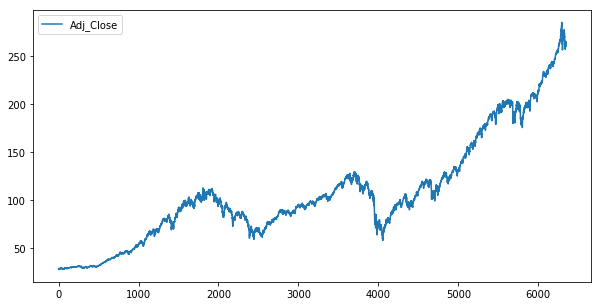

In [84]:
ds=pd.DataFrame(ds[:-2])
print(ds)
ds.plot(figsize=(10,5))

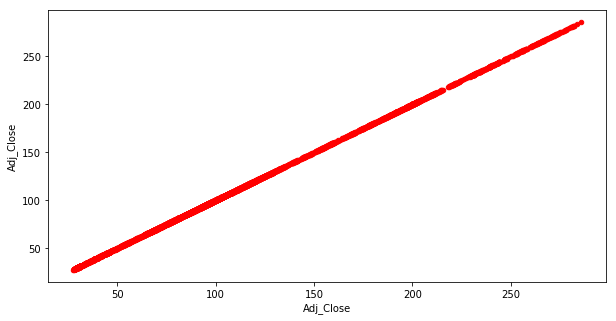

In [85]:
ds.plot(kind='scatter',x='Adj_Close',y='Adj_Close',c='red',figsize=(10,5))

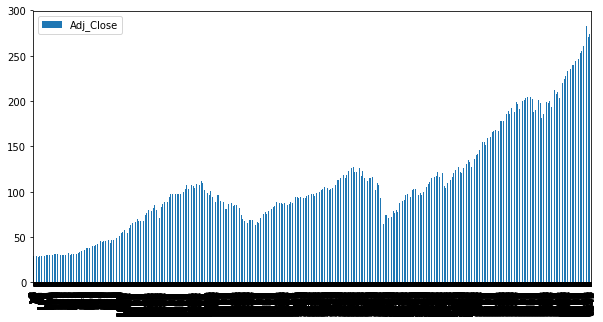

In [87]:
ds.plot(kind='bar',figsize=(10,5),rot=90)

In [90]:
SPY=pd.read_csv('C:\\Users\\usere\\Desktop\\SPY.csv',parse_dates=[0],dayfirst=True)
loan=pd.read_csv('C:\\Users\\usere\\Desktop\\Loan Data.csv',parse_dates=[0],dayfirst=True)

In [92]:
SPY.describe()

,Adj_Close,Adj_Volume
count,6347.000000,6.349000e+03
mean,108.171940,8.439630e+07
std,64.541711,1.003193e+08
min,27.882638,5.200000e+03
25%,73.212058,6.405600e+06
50%,97.311651,5.469196e+07
75%,124.149164,1.250593e+08
max,2651.500000,8.710263e+08


In [95]:
SPY['Adj_Close'].isnull().sum()

2

In [96]:
SPY['Adj_Volume'].isnull().sum()

0

In [97]:
SPY_dropna=SPY.dropna()
SPY_dropna.describe()

,Adj_Close,Adj_Volume
count,6347.000000,6.347000e+03
mean,108.171940,8.441205e+07
std,64.541711,1.003293e+08
min,27.882638,5.200000e+03
25%,73.212058,6.405600e+06
50%,97.311651,5.469196e+07
75%,124.149164,1.250963e+08
max,2651.500000,8.710263e+08


In [98]:
SPY_fill0=SPY.fillna(0)
SPY_fill0.head(4).append(SPY_fill0.tail(4))

,Date,Adj_Close,Adj_Volume
0,1993-01-29,28.223927,1003200
1,1993-02-01,28.424666,480500
2,1993-02-02,0.000000,201300
3,1993-02-03,28.785997,529400
6345,2018-04-11,263.760000,91082611
6346,2018-04-12,0.000000,68648611
6347,2018-04-13,2651.500000,85043940
6348,2018-04-16,267.330000,63354866


In [99]:
SPY_fill0=SPY.fillna(method='bfill')
SPY_fill0.head(4).append(SPY_fill0.tail(4))

,Date,Adj_Close,Adj_Volume
0,1993-01-29,28.223927,1003200
1,1993-02-01,28.424666,480500
2,1993-02-02,28.785997,201300
3,1993-02-03,28.785997,529400
6345,2018-04-11,263.760000,91082611
6346,2018-04-12,2651.500000,68648611
6347,2018-04-13,2651.500000,85043940
6348,2018-04-16,267.330000,63354866


In [100]:
SPY_fill0=SPY.fillna(method='ffill')
SPY_fill0.head(4).append(SPY_fill0.tail(4))

,Date,Adj_Close,Adj_Volume
0,1993-01-29,28.223927,1003200
1,1993-02-01,28.424666,480500
2,1993-02-02,28.424666,201300
3,1993-02-03,28.785997,529400
6345,2018-04-11,263.760000,91082611
6346,2018-04-12,263.760000,68648611
6347,2018-04-13,2651.500000,85043940
6348,2018-04-16,267.330000,63354866


In [101]:
SPY.describe()

,Adj_Close,Adj_Volume
count,6347.000000,6.349000e+03
mean,108.171940,8.439630e+07
std,64.541711,1.003193e+08
min,27.882638,5.200000e+03
25%,73.212058,6.405600e+06
50%,97.311651,5.469196e+07
75%,124.149164,1.250593e+08
max,2651.500000,8.710263e+08


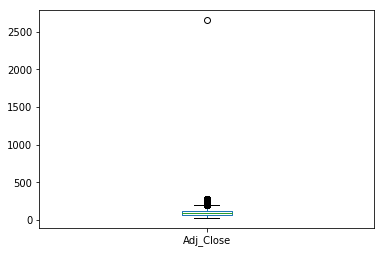

In [102]:
SPY['Adj_Close'].plot(kind='box')

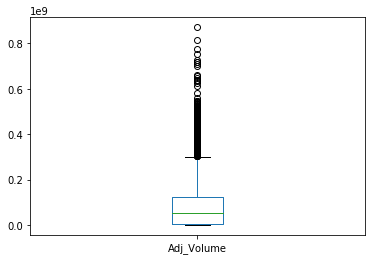

In [103]:
SPY['Adj_Volume'].plot(kind='box')

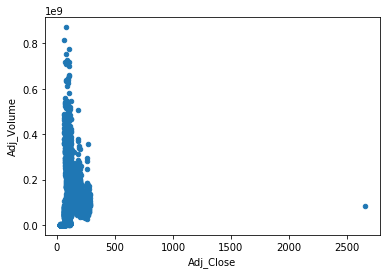

In [104]:
SPY.plot(kind='scatter',x='Adj_Close',y='Adj_Volume')

离群值占比很小就可以直接删除

In [109]:
mu=SPY['Adj_Close'].describe().loc['mean']
sigma=SPY['Adj_Close'].describe().loc['std']
lb=np.maximum(mu-3*sigma,0)
ub=mu+3*sigma
(lb,ub)

(0.0, 301.79707288450953)

In [110]:
bool_idx=((SPY['Adj_Close']<=lb)|(SPY['Adj_Close']>=ub))
bool_idx.sum()

1

In [111]:
SPY[bool_idx]

,Date,Adj_Close,Adj_Volume
6347,2018-04-13,2651.5,85043940


In [112]:
SPY[bool_idx].index

Int64Index([6347], dtype='int64')

In [114]:
SPY.drop(SPY[bool_idx].index,inplace=True)
SPY.describe()

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Adj_Close,Adj_Volume
count,6346.000000,6.348000e+03
mean,107.771164,8.439620e+07
std,56.095110,1.003272e+08
min,27.882638,5.200000e+03
25%,73.195260,6.398825e+06
50%,97.307411,5.459568e+07
75%,124.144102,1.250778e+08
max,285.438268,8.710263e+08


get_dummies是利用pandas实现one hot encode的方式

计算机无法识别字符型变量，需要通过encoding转成数值型

In [115]:
loan['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [116]:
#prefix转换后列名的前缀
pd.get_dummies(loan['loan_grade'],prefix='loan_grade')

,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0
8,1,0,0,0,0,0,0
9,0,0,0,1,0,0,0


In [117]:
pd.get_dummies(loan['loan_grade'],prefix='loan_grade',drop_first=True)

,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,1,0,0,0


In [118]:
pd.crosstab(index=loan['person_emp_length'],
           columns=loan['loan_status'],
           normalize=True).style.format('{:.2%}')

loan_status,0,1
person_emp_length,,
0.0,9.34%,3.62%
1.0,6.66%,2.54%
2.0,9.03%,3.11%
3.0,8.71%,2.20%
4.0,7.15%,1.93%
5.0,7.57%,1.73%
6.0,6.84%,1.58%
7.0,5.63%,1.30%
8.0,4.44%,0.89%


In [122]:
loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [119]:
bins=pd.qcut(loan['person_emp_length'],4)
bins

0         (7.0, 123.0]
1           (4.0, 7.0]
2        (-0.001, 2.0]
3           (2.0, 4.0]
4         (7.0, 123.0]
5        (-0.001, 2.0]
6         (7.0, 123.0]
7           (4.0, 7.0]
8         (7.0, 123.0]
9           (4.0, 7.0]
10          (4.0, 7.0]
11       (-0.001, 2.0]
12       (-0.001, 2.0]
13          (2.0, 4.0]
14       (-0.001, 2.0]
15          (4.0, 7.0]
16       (-0.001, 2.0]
17          (4.0, 7.0]
18        (7.0, 123.0]
19        (7.0, 123.0]
20       (-0.001, 2.0]
21        (7.0, 123.0]
22          (2.0, 4.0]
23       (-0.001, 2.0]
24          (2.0, 4.0]
25        (7.0, 123.0]
26          (2.0, 4.0]
27       (-0.001, 2.0]
28          (4.0, 7.0]
29          (4.0, 7.0]
             ...      
32551       (4.0, 7.0]
32552    (-0.001, 2.0]
32553    (-0.001, 2.0]
32554    (-0.001, 2.0]
32555       (2.0, 4.0]
32556    (-0.001, 2.0]
32557       (2.0, 4.0]
32558       (4.0, 7.0]
32559    (-0.001, 2.0]
32560       (2.0, 4.0]
32561       (4.0, 7.0]
32562     (7.0, 123.0]
32563    (-

In [120]:
loan['person_emp_length'].describe()

count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [121]:
bins.value_counts()

(-0.001, 2.0]    10869
(4.0, 7.0]        7808
(7.0, 123.0]      6679
(2.0, 4.0]        6330
Name: person_emp_length, dtype: int64

In [125]:
loan['person_emp_bin']=bins
loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_bin
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(7.0, 123.0]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(4.0, 7.0]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(-0.001, 2.0]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(2.0, 4.0]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(7.0, 123.0]"
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,"(-0.001, 2.0]"
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,"(7.0, 123.0]"
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,"(4.0, 7.0]"
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,"(7.0, 123.0]"
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,"(4.0, 7.0]"
